In [1]:
import numpy as np
import pandas as pd

# Classifiers and Ensembles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

In [9]:
# Labels
y = pd.read_csv('y_im.csv', header=None)
y=y.to_numpy()
y=np.ravel(y)
print(y.shape)

# deep features
X = pd.read_csv('X_im.csv', header=None)
X=X.to_numpy()
print(X.shape)
print(y.shape)

(2040,)
(2040, 2048)
(2040,)


In [10]:
def classifier_select(fselect):
    
    # KNeighborsClassifier
    if fselect == 1:

        knn_params=[{'n_neighbors':[1,3,5,7,9,11], 'weights': ['uniform', 'distance'], 'p':[1,2]}]
        knn = KNeighborsClassifier()
        
        return knn_params, knn
        
    # Naive Bayes
    elif fselect == 2:
        
        nb_params=[{'var_smoothing':[1e-09,1e-03, 1e-06]}]
        nb = GaussianNB()
    
        return nb_params, nb
        
    # Decision Tree
    elif fselect == 3:
        
        dc_params=[{'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth': [None, 5, 10],
            'min_samples_split':[2, 5],
            'splitter':['random', 'best']}] 
        dt = DecisionTreeClassifier()
        
        return dc_params, dt
        
    # Multilayer perceptron
    elif fselect == 4:
        
        mlp_params=[{'hidden_layer_sizes':[16, (16, 8), (16, 8, 4)],
                   'learning_rate': ['constant', 'invscaling'],
                    'learning_rate_init':[0.01, 0.001, 0.0001],
                    'activation':['relu', 'logistic', 'tanh'],
                   'random_state':[10, 46, 37]}] 
        mlp = MLPClassifier()
        
        return mlp_params, mlp 
        
    # Support Vector Machine
    else:
        svm_params=[{'kernel':["linear", "poly"]}]
        svm = SVC()
        
        return svm_params, svm

params, clf = classifier_select(2)
    
X,X_val,y,y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


gs=GridSearchCV(clf, params, scoring='accuracy', cv=5, n_jobs=-1)

gs.fit(X_val, y_val)

df=gs.cv_results_
df = pd.DataFrame(gs.cv_results_)
print("Melhores parâmetros encontrados: ", gs.best_params_)

clf = gs.best_estimator_
df

Melhores parâmetros encontrados:  {'var_smoothing': 1e-09}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.042336,0.001847,0.009717,0.000313,0.0,{'var_smoothing': 1e-09},0.609756,0.463415,0.500000,0.555556,0.543210,0.534387,0.049852,1
1,0.045358,0.003902,0.008010,0.001714,0.001,{'var_smoothing': 0.001},0.585366,0.463415,0.487805,0.555556,0.530864,0.524601,0.044244,3
2,0.041378,0.004028,0.006464,0.001166,0.000001,{'var_smoothing': 1e-06},0.597561,0.463415,0.500000,0.555556,0.543210,0.531948,0.046275,2


In [47]:
X = X_all
y = y_all

num = []

for i in range(5):
    params, clf = classifier_select(i + 1)
    num.append(clf)

def ensemble_select(fselect, fnum):
    
    if fselect == 1:
        adc = AdaBoostClassifier()
        adc_params = [{'estimator': fnum, 
                       'n_estimators': [10, 25, 50, 75, 100], 
                       'learning_rate': [0.7, 0.8, 1]}] 
        
        return adc, adc_params

    elif fselect == 2:
        rfc = RandomForestClassifier()
        rfc_params = [{'n_estimators': [10, 25, 50, 75, 100], 
                       "criterion": ["gini", 'entropy', "log_loss"], 
                       "max_depth": [10, 11, 12]}]
        
        return rfc, rfc_params
    
    else:
        bg = BaggingClassifier()
        bg_params = [{'estimator': fnum, 
                      'n_estimators': [10, 25, 50, 75, 100], 
                      'max_samples': [0.7, 0.8, 1]}]
        
        return bg, bg_params
        

clf, params = ensemble_select(2, num)

X,X_val,y,y_val=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

gs=GridSearchCV(clf, params, scoring='accuracy', cv=5, n_jobs=-1)

gs.fit(X_val, y_val)

df=gs.cv_results_
df = pd.DataFrame(gs.cv_results_)
print("Melhores parâmetros encontrados: ", gs.best_params_)

clf=gs.best_estimator_
df

Melhores parâmetros encontrados:  {'criterion': 'log_loss', 'max_depth': 12, 'n_estimators': 75}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051290,0.005361,0.003976,0.000569,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.940541,0.891304,0.923913,0.902174,0.875000,0.906586,0.023254,44
1,0.089697,0.004951,0.003454,0.002394,gini,10,25,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.956757,0.907609,0.945652,0.940217,0.896739,0.929395,0.023113,10
2,0.188713,0.010927,0.010764,0.002466,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.945946,0.880435,0.961957,0.929348,0.902174,0.923972,0.029412,28
3,0.286051,0.019875,0.009791,0.000506,gini,10,75,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.940541,0.907609,0.961957,0.934783,0.896739,0.928325,0.023447,11
4,0.365269,0.010018,0.014212,0.001676,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",0.935135,0.891304,0.956522,0.934783,0.885870,0.920723,0.027449,32
5,0.033946,0.001539,0.002199,0.000411,gini,11,10,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.929730,0.880435,0.923913,0.929348,0.896739,0.912033,0.019932,42
6,0.093932,0.007733,0.005180,0.001043,gini,11,25,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.940541,0.891304,0.945652,0.945652,0.902174,0.925065,0.023456,21
7,0.184376,0.008476,0.008612,0.002722,gini,11,50,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.929730,0.902174,0.961957,0.945652,0.891304,0.926163,0.026322,16
8,0.285876,0.002441,0.010800,0.001536,gini,11,75,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.935135,0.913043,0.961957,0.945652,0.891304,0.929418,0.024802,7
9,0.368091,0.007583,0.015514,0.001988,gini,11,100,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",0.935135,0.907609,0.956522,0.940217,0.896739,0.927244,0.021927,14


Acurácia média: 0.563
Desvio padrão: 0.007
Precision: 0.562
Recall: 0.562
f1: 0.562


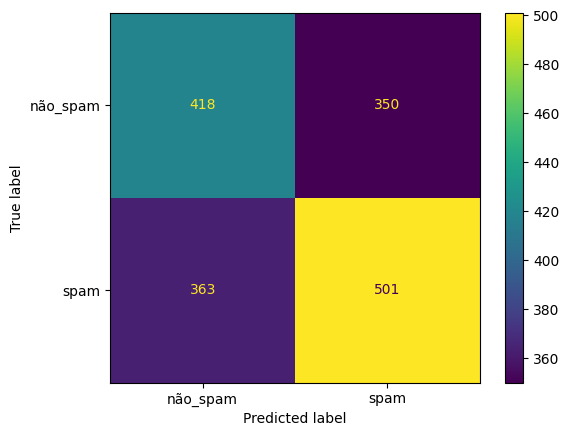

In [11]:
result=model_selection.cross_val_score(clf, X, y, cv=5)
print("Acurácia média: %.3f" % result.mean())
print("Desvio padrão: %.3f" % result.std())

# Calculando a predição para cada exemplo de teste
y_pred=model_selection.cross_val_predict(clf, X, y, cv=5)

# Calcular precisão
precision=precision_score(y, y_pred, average='macro')

# Calcular revocação
recall=recall_score(y, y_pred, average='macro')

# Calcular revocação
f1=f1_score(y, y_pred, average='macro')

print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("f1: %.3f" % f1)

cm = confusion_matrix(y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['não_spam', 'spam'])
disp.plot()